# Proyecto de Analisis de datos sobre muerte por maternidad

## Gerardo Leyva Conde 2024/06/08

### Introduccion

Este proyecto es para el curso propedéutico de la maestría en ciencia de datos.
Haremos un pequeño análisis a los datos de mortalidad materna del año 2021 al 2022 de los datos proporcionados por la Secretaría de Salud de México. Esto con el fin de encontrar alguna relación relevante entre los datos. Donde se planteará la descarga de los datos, la importación de estos a una base de datos y una exploración de los mismos.

### Descarga de los datos

Para la descarga de los datos usaremos el siguiente [link](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_muertematerna_gobmx.html). Esto nos dara un archivo Zip y dentro un xlsx.

### Creacion de DB

Si aun no tenemos una base de datos, no te preocupes, aqui lo puedes hacer. En este caso usaremos MySQL y si no tenemos un manejador, abrimos la consola y ejecutamos el siguiente comando:
```sql
CREATE DATABASE mortalidad_materna_2002_2022;
```

### Creacion de tabla

Si aún no tenemos una base de datos, no te preocupes, aquí lo puedes hacer. En este caso usaremos MySQL y, si no tenemos un administrador de base de datos, abrimos la consola y ejecutamos el siguiente comando:
```sql
USE mortalidad_materna_2002_2022;

CREATE TABLE defunciones (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    ANIO_NACIMIENTO INT,
    MES_NACIMIENTO INT,
    MES_NACIMIENTOD VARCHAR(50),
    DIA_NACIMIENTO INT,
    EDAD INT,
    ESTADO_CONYUGAL INT,
    ESTADO_CONYUGALD VARCHAR(255),
    ENTIDAD_RESIDENCIA INT,
    ENTIDAD_RESIDENCIAD VARCHAR(255),
    MUNICIPIO_RESIDENCIA INT,
    MUNICIPIO_RESIDENCIAD VARCHAR(255),
    LOCALIDAD_RESIDENCIA INT,
    LOCALIDAD_RESIDENCIAD VARCHAR(255),
    TAMANIO_LOCALIDAD INT,
    TAMANIO_LOCALIDADD VARCHAR(255),
    OCUPACION_HABITUAL INT,
    OCUPACION_HABITUALD VARCHAR(255),
    ESCOLARIDAD INT,
    ESCOLARIDADD VARCHAR(255),
    DERECHOHABIENCIA INT,
    DERECHOHABIENCIAD VARCHAR(255),
    ENTIDAD_OCURRENCIA INT,
    ENTIDAD_OCURRENCIAD VARCHAR(255),
    MUNICIPIO_OCURRENCIA INT,
    MUNICIPIO_OCURRENCIAD VARCHAR(255),
    LOCALIDAD_OCURRENCIA INT,
    LOCALIDAD_OCURRENCIAD VARCHAR(255),
    SITIO_DEFUNCION INT,
    SITIO_DEFUNCIOND VARCHAR(255),
    ANIO_DEFUNCION INT,
    MES_DEFUNCION INT,
    MES_DEFUNCIOND VARCHAR(50),
    DIA_DEFUNCION INT,
    HORA_DEFUNCION INT,
    MINUTOS_DEFUNCION INT,
    ASISTENCIA_MEDICA INT,
    ASISTENCIA_MEDICAD VARCHAR(255),
    CAUSA_CIE_4 VARCHAR(4),
    CAUSA_CIE_4D VARCHAR(255),
    CERTIFICO INT,
    CERTIFICOD VARCHAR(255),
    ENTIDAD_REGISTRO INT,
    ENTIDAD_REGISTROD VARCHAR(255),
    MUNICIPIO_REGISTRO INT,
    MUNICIPIO_REGISTROD VARCHAR(255),
    ANIO_REGISTRO INT,
    MES_REGISTRO INT,
    MES_REGISTROD VARCHAR(50),
    DIA_REGISTRO INT,
    ANIO_CERTIFICACION INT,
    MES_CERTIFICACION INT,
    MES_CERTIFICACIOND VARCHAR(50),
    DIA_CERTIFICACION INT,
    ANIO_BASE_DATOS INT,
    RAZON_MORTALIDAD_MATERNA INT,
    RAZON_MORTALIDAD_MATERNAD VARCHAR(255),
    EDAD_QUINQUENAL INT,
    EDAD_QUINQUENALD VARCHAR(255)
);
```

### Importacion de librerias

Primero, cargamos todas las librerías necesarias para poder ejecutar esta libreta.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as mysql


### Carga de los datos

Ahora que ya tenemos nuestra base de datos y nuestra tabla, lo siguiente es agregar nuestros datos. Para hacerlo primero crearemos un DataFrame con nuestros datos.

In [2]:
df_datos = pd.read_excel('mortalidad_materna_2002_2022.xlsx')
df_datos.head(10)

,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,...,DIA_REGISTRO,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD
0,1967,5,MAYO,4,35,1,SOLTERO,16,MICHOACÁN DE OCAMPO,104,...,15,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,6,35 a 39 años
1,1965,0,NO ESPECIFICADO,0,37,5,CASADO,20,OAXACA,41,...,9,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,6,35 a 39 años
2,1956,2,FEBRERO,4,46,5,CASADO,12,GUERRERO,1,...,2,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,8,45 a 49 años
3,1980,9,SEPTIEMBRE,3,22,5,CASADO,28,TAMAULIPAS,38,...,27,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,3,20 a 24 años
4,1947,12,DICIEMBRE,20,54,5,CASADO,27,TABASCO,3,...,22,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,9,50 a 54 años
5,1971,11,NOVIEMBRE,26,27,5,CASADO,9,CIUDAD DE MÉXICO,10,...,26,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años
6,1960,6,JUNIO,4,42,4,UNION LIBRE,20,OAXACA,107,...,20,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,7,40 a 44 años
7,1970,12,DICIEMBRE,14,31,4,UNION LIBRE,26,SONORA,29,...,18,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,5,30 a 34 años
8,1966,8,AGOSTO,4,36,5,CASADO,14,JALISCO,53,...,29,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años
9,1980,0,NO ESPECIFICADO,0,22,4,UNION LIBRE,30,VERACRUZ DE IGNACIO DE LA LLAVE,130,...,20,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años


Ya que validamos que pudimos leer bien nuestros datos, crearemos la conexión a nuestra base de datos (Recuerda cambiar los datos por tus credenciales y/o datos):

In [3]:
def conectar_mysql():
    try:
        conn = mysql.connect(
            host='localhost',
            user='root',
            password='root',
            database='mortalidad_materna_2002_2022'
        )

        cursor = conn.cursor()

        return conn, cursor

    except mysql.connector.Error as error:
        print("Error al conectar a MySQL:", error)
        return None, None

Entonces hacemos la inseccion con el siguiente Script

In [4]:
conn, cursor = conectar_mysql()

cursor = conn.cursor()
columnas = ', '.join(df_datos.columns)
for row in df_datos.itertuples(index=False):
    valores = tuple(row)
    insertar_sql = f"INSERT INTO defunciones ({columnas}) VALUES ({', '.join(['%s' for _ in range(len(valores))])});"
    cursor.execute(insertar_sql, valores)

conn.commit()
conn.close()

Ahora vamos a validar que los datos de nuestra inserción se hayan hecho correctamente con una pequeña consulta.

In [5]:
def consulta_sql(query, tipo=None):
    try:
        conn, cursor = conectar_mysql()
        consulta = query
        cursor.execute(consulta)
        
        if tipo=='update':
            conn.commit()
            resultados=True

        else:
            resultados = cursor.fetchall()

        return resultados;

    except Exception as error:
        print("Error al ejecutar la consulta:", error)

    finally:
        cursor.close()
        conn.close()
dato = consulta_sql("SELECT * FROM defunciones LIMIT 1;")
print(dato)

[(1, 1967, 5, 'MAYO', 4, 35, 1, 'SOLTERO', 16, 'MICHOACÁN DE OCAMPO', 104, 'VILLAMAR', 24, 'NICOLÁS ROMERO', 1, '1 A 999            HABITANTES', 62, 'TRABAJADORES DE APOYO EN ACTIVIDADES ADMVAS.', 6, 'SECUNDARIA COMPLETA', 3, 'ISSSTE', 16, 'MICHOACÁN DE OCAMPO', 104, 'VILLAMAR', 24, 'NICOLÁS ROMERO', 11, 'HOGAR', 2002, 7, 'JULIO', 11, 15, 0, 1, 'CON ATENCION MEDICA', 'O96X', 'O96X  MUERTE MATERNA DEBIDA A CUALQUIER CAUSA OBSTÉTRICA QUE OCURRE DESPUÉS DE 42 DÍAS PERO ANTES DE UN AÑO DEL PARTO', 3, 'OTRO MEDICO', 16, 'MICHOACÁN DE OCAMPO', 104, 'VILLAMAR', 2002, 7, 'JULIO', 15, 0, 0, 'NO ESPECIFICADO', 0, 2002, 0, 'MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MORTALIDAD MATERNA', 6, '35 a 39 años')]


### Analisis de los datos

Ya que tenemos listos nuestros datos para poder consultar, crearemos un nuevo DataFrame con los datos donde el año de defunción haya sido entre 2021 y 2022 y que sean de SONORA. Eso lo haremos de la siguiente manera.

In [6]:
defunciones=consulta_sql("SELECT * FROM defunciones WHERE ANIO_DEFUNCION BETWEEN 2021 AND 2022 AND ENTIDAD_RESIDENCIAD='SONORA';")
columnas_con_id = df_datos.columns.tolist()
columnas_con_id.insert(0, "ID")
df_registros = pd.DataFrame(defunciones, columns=columnas_con_id)

'''
#Vamos agregar 2 columnas nuevas llamada FECHA_DEFUNCION y FECHA_DEFUNCION en nuestro DataFrame, 
para poder tener la fehca y hora de la defuncion tomando varios valores de las columnas
'''

df_registros['FECHA_DEFUNCION'] = pd.to_datetime({
    'year': df_registros['ANIO_DEFUNCION'],
    'month': df_registros['MES_DEFUNCION'],
    'day': df_registros['DIA_DEFUNCION'],
    'hour': df_registros['HORA_DEFUNCION'],
    'minute': df_registros['MINUTOS_DEFUNCION']
})
df_registros['FECHA_NACIMIENTO'] = pd.to_datetime({
    'year': df_registros['ANIO_NACIMIENTO'],
    'month': df_registros['MES_NACIMIENTO'],
    'day': df_registros['DIA_NACIMIENTO']
}, errors='coerce')
df_registros

,ID,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,...,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD,FECHA_DEFUNCION,FECHA_NACIMIENTO
0,21154,1991,9,SEPTIEMBRE,13,29,4,UNION LIBRE,26,SONORA,...,8,AGOSTO,23,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años,2021-08-23 14:32:00,1991-09-13
1,21159,1986,5,MAYO,13,35,5,CASADO,26,SONORA,...,10,OCTUBRE,20,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-10-19 16:10:00,1986-05-13
2,21859,1985,12,DICIEMBRE,26,35,5,CASADO,26,SONORA,...,1,ENERO,21,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-01-21 00:37:00,1985-12-26
3,21860,1990,9,SEPTIEMBRE,19,30,1,SOLTERO,26,SONORA,...,1,ENERO,30,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,5,30 a 34 años,2021-01-30 06:40:00,1990-09-19
4,21861,1983,5,MAYO,16,38,5,CASADO,26,SONORA,...,6,JUNIO,6,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-06-06 14:25:00,1983-05-16
5,21862,1982,9,SEPTIEMBRE,6,38,4,UNION LIBRE,26,SONORA,...,1,ENERO,9,2021,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,6,35 a 39 años,2021-01-09 23:13:00,1982-09-06
6,21863,1986,4,ABRIL,18,35,5,CASADO,26,SONORA,...,6,JUNIO,19,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-06-19 11:31:00,1986-04-18
7,21864,1984,10,OCTUBRE,8,36,0,SE IGNORA,26,SONORA,...,8,AGOSTO,3,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-08-03 18:10:00,1984-10-08
8,21865,1990,1,ENERO,2,31,1,SOLTERO,26,SONORA,...,5,MAYO,3,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,5,30 a 34 años,2021-05-03 03:00:00,1990-01-02
9,21866,1993,4,ABRIL,5,28,1,SOLTERO,26,SONORA,...,6,JUNIO,7,2021,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años,2021-06-06 19:15:00,1993-04-05


Si quisieras agregar las 2 columnas extras a nuestra base de datos, primero tendremos que agregar las columnas. Aquí está el ejemplo del comando en consola:
```sql
ALTER TABLE defunciones ADD COLUMN FECHA_NACIMIENTO DATE, ADD COLUMN FECHA_DEFUNCION DATE;
```

También agrego el Script para agregarle la fecha de nacimiento y defunción que añadimos a nuestro DataFrame a nuestra base de datos.

In [10]:
for index, fila in df_registros.iterrows():
    id_registro = fila['ID']
    fecha_nacimiento = fila['FECHA_NACIMIENTO']
    fecha_defuncion = fila['FECHA_DEFUNCION']
    if not pd.isna(fecha_nacimiento) and not pd.isna(fecha_defuncion):
        sql = f"""
        UPDATE defunciones
        SET FECHA_NACIMIENTO = '{fecha_nacimiento}',
            FECHA_DEFUNCION = '{fecha_defuncion}'
        WHERE ID = {id_registro};
        """
        consulta_sql(sql, 'update')
consulta_sql('SELECT FECHA_DEFUNCION, FECHA_NACIMIENTO FROM defunciones WHERE ID = 21154;')

[(datetime.date(2021, 8, 23), datetime.date(1991, 9, 13))]

Como podemos observar, tenemos 45 con los que podamos trabajar, pero, también podemos ver que no todas las columnas no son útiles, ya que hay información que está “duplicada”. Ejemplo: tenemos las columnas “MES_NACIMIENTO” y “MES_NACIMIENTOD”, donde una es de tipo INT y el otro de tipo STRING(VARCHAR en SQL) sin mencionar que ya tenemos las fechas tipo Timestamp que hicimos anteriormente. Entonces, para términos de lectura, nos vamos a deshacer de estas columnas de tipo numéricos, puesto que es más visible usar los nombres al momento de graficar.

Procedemos a seleccionar las columnas que sean de datos numéricos.

In [11]:
columnas_int=df_registros.dtypes[df_registros.dtypes == 'int64'].index.tolist()
print(columnas_int)

['ID', 'ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'DIA_NACIMIENTO', 'EDAD', 'ESTADO_CONYUGAL', 'ENTIDAD_RESIDENCIA', 'MUNICIPIO_RESIDENCIA', 'LOCALIDAD_RESIDENCIA', 'TAMANIO_LOCALIDAD', 'OCUPACION_HABITUAL', 'ESCOLARIDAD', 'DERECHOHABIENCIA', 'ENTIDAD_OCURRENCIA', 'MUNICIPIO_OCURRENCIA', 'LOCALIDAD_OCURRENCIA', 'SITIO_DEFUNCION', 'ANIO_DEFUNCION', 'MES_DEFUNCION', 'DIA_DEFUNCION', 'HORA_DEFUNCION', 'MINUTOS_DEFUNCION', 'ASISTENCIA_MEDICA', 'CERTIFICO', 'ENTIDAD_REGISTRO', 'MUNICIPIO_REGISTRO', 'ANIO_REGISTRO', 'MES_REGISTRO', 'DIA_REGISTRO', 'ANIO_CERTIFICACION', 'MES_CERTIFICACION', 'DIA_CERTIFICACION', 'ANIO_BASE_DATOS', 'RAZON_MORTALIDAD_MATERNA', 'EDAD_QUINQUENAL']


Con las únicas columnas con las que nos vamos a quedar va a ser “EDAD”, “ANIO_REGISTRO”, “MES_REGISTRO”, “DIA_REGISTRO”, “ANIO_CERTIFICACION”, “MES_CERTIFICACION”, “DIA_CERTIFICACION” “ANIO_BASE_DATOS” y “EDAD_QUINQUENAL” porque son las únicas que no repiten información y nos pueden resultar útiles después, por lo que procederemos a quitarlas.

In [12]:
columnas_eliminar = ['EDAD','ANIO_REGISTRO', 'MES_REGISTRO', 'DIA_REGISTRO', 'ANIO_CERTIFICACION', 'MES_CERTIFICACION', 'DIA_CERTIFICACION', 'ANIO_BASE_DATOS', 'EDAD_QUINQUENAL']
for col in columnas_eliminar:
    columnas_int.remove(col)
df_registros = df_registros.drop(columns=columnas_int)
df_registros

,MES_NACIMIENTOD,EDAD,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIAD,LOCALIDAD_RESIDENCIAD,TAMANIO_LOCALIDADD,OCUPACION_HABITUALD,ESCOLARIDADD,DERECHOHABIENCIAD,...,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD,FECHA_DEFUNCION,FECHA_NACIMIENTO
0,SEPTIEMBRE,29,UNION LIBRE,SONORA,SAN LUIS RIO COLORADO,SAN LUIS RÍO COLORADO,100000 A 249999 HABITANTES,"COMERCIANTES, EMPLEADOS EN VENTAS Y AGENTES DE...",SECUNDARIA COMPLETA,NINGUNA,...,2021,8,AGOSTO,23,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años,2021-08-23 14:32:00,1991-09-13
1,MAYO,35,CASADO,SONORA,SAN LUIS RIO COLORADO,SAN LUIS RÍO COLORADO,100000 A 249999 HABITANTES,NO TRABAJA,SECUNDARIA COMPLETA,IMSS,...,2021,10,OCTUBRE,20,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-10-19 16:10:00,1986-05-13
2,DICIEMBRE,35,CASADO,SONORA,HERMOSILLO,HERMOSILLO,500000 A 999999 HABITANTES,PROFESIONISTAS Y TÉCNICOS,PROFESIONAL,OTRA,...,2021,1,ENERO,21,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-01-21 00:37:00,1985-12-26
3,SEPTIEMBRE,30,SOLTERO,SONORA,AGUA PRIETA,AGUA PRIETA,75000 A 99999 HABITANTES,NO TRABAJA,SECUNDARIA COMPLETA,NINGUNA,...,2021,1,ENERO,30,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,5,30 a 34 años,2021-01-30 06:40:00,1990-09-19
4,MAYO,38,CASADO,SONORA,CAJEME,CIUDAD OBREGÓN,250000 A 499999 HABITANTES,OCUPACIONES INSUFICIENTEMENTE ESPECIFICADAS,PROFESIONAL,OTRA,...,2021,6,JUNIO,6,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-06-06 14:25:00,1983-05-16
5,SEPTIEMBRE,38,UNION LIBRE,SONORA,AGUA PRIETA,AGUA PRIETA,75000 A 99999 HABITANTES,NO TRABAJA,BACHILLERATO O PREPARATORIA INCOMPLETA,IMSS,...,2021,1,ENERO,9,2021,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,6,35 a 39 años,2021-01-09 23:13:00,1982-09-06
6,ABRIL,35,CASADO,SONORA,CAJEME,CIUDAD OBREGÓN,250000 A 499999 HABITANTES,NO TRABAJA,BACHILLERATO O PREPARATORIA COMPLETA,IMSS,...,2021,6,JUNIO,19,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-06-19 11:31:00,1986-04-18
7,OCTUBRE,36,SE IGNORA,SONORA,GUAYMAS,HEROICA GUAYMAS,100000 A 249999 HABITANTES,OCUPACIÓN NO ESPECIFICADA,NO ESPECIFICADA,IMSS,...,2021,8,AGOSTO,3,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,2021-08-03 18:10:00,1984-10-08
8,ENERO,31,SOLTERO,SONORA,HERMOSILLO,HERMOSILLO,500000 A 999999 HABITANTES,NO TRABAJA,BACHILLERATO O PREPARATORIA INCOMPLETA,IMSS,...,2021,5,MAYO,3,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,5,30 a 34 años,2021-05-03 03:00:00,1990-01-02
9,ABRIL,28,SOLTERO,SONORA,SAN MIGUEL DE HORCASITAS,PESQUEIRA,5000 A 9999 HABITANTES,TRABAJADORES EN ACTIVIDADES ELEMENTALES Y DE A...,PRIMARIA INCOMPLETA,NINGUNA,...,2021,6,JUNIO,7,2021,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años,2021-06-06 19:15:00,1993-04-05


De 61 columnas pasamos a 35, pero aun así no sabemos si todos estos datos nos van a ser útiles. Por lo que tenemos que darle un enfoque al análisis. 

Primero quiero saber la cantidad de defunciones agrupadas por edad.

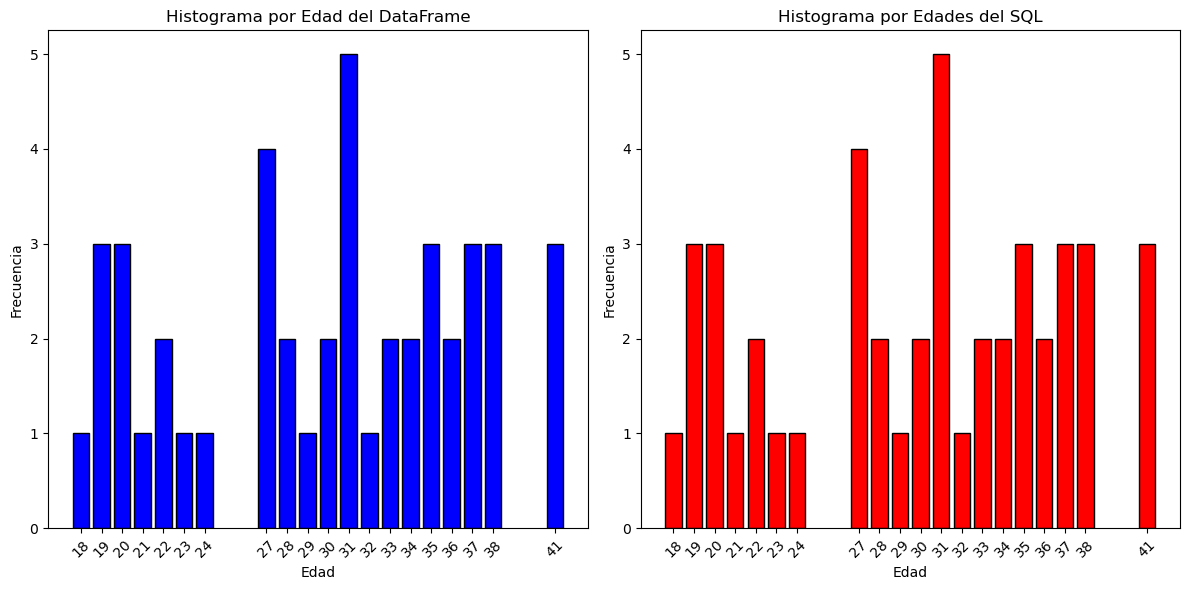

In [13]:
'''
Datos obtenidos directamente desde el DataFrame
'''
edades = df_registros.groupby('EDAD')
conteo_edad = edades.size()

'''
Tambien podriamos hacer esto directamente con una consulta SQL. Asi que haremos las 2 formas
'''
edades_sql = consulta_sql('SELECT EDAD, COUNT(*) AS frecuencia FROM defunciones WHERE ANIO_DEFUNCION BETWEEN 2021 AND 2022 AND ENTIDAD_RESIDENCIAD="SONORA" GROUP BY EDAD;')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(conteo_edad.index, conteo_edad.values, color='blue', edgecolor='black')
axs[0].set_title('Histograma por Edad del DataFrame')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')
axs[0].set_xticks(conteo_edad.index)
axs[0].set_xticklabels(conteo_edad.index, rotation=45)

axs[1].bar([fila[0] for fila in edades_sql], [fila[1] for fila in edades_sql], color='red', edgecolor='black')
axs[1].set_title('Histograma por Edades del SQL')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Frecuencia')
axs[1].set_xticks(conteo_edad.index)
axs[1].set_xticklabels(conteo_edad.index, rotation=45)

plt.tight_layout()
plt.show()

Como podemos observar, no hay un rango de edad que me parezca muy crítico como para tomar como base el análisis. Por lo que optaré por revisar otra columna, por ejemplo, si se recibió asistencia médica de por medio.

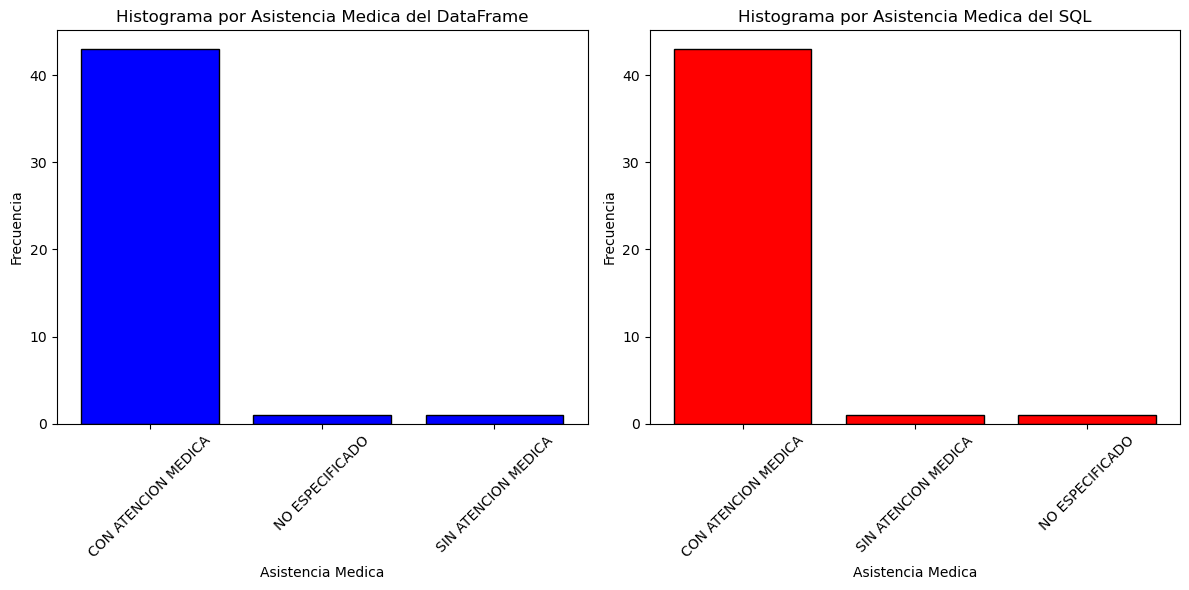

In [14]:
'''
Datos obtenidos directamente desde el DataFrame
'''
asis_med = df_registros.groupby('ASISTENCIA_MEDICAD')
conteo_asis = asis_med.size()

'''
Tambien podriamos hacer esto directamente con una consulta SQL. Asi que haremos las 2 formas
'''
asis_sql = consulta_sql('SELECT ASISTENCIA_MEDICAD, COUNT(*) AS frecuencia FROM defunciones WHERE ANIO_DEFUNCION BETWEEN 2021 AND 2022 AND ENTIDAD_RESIDENCIAD="SONORA" GROUP BY ASISTENCIA_MEDICAD;')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(conteo_asis.index, conteo_asis.values, color='blue', edgecolor='black')
axs[0].set_title('Histograma por Asistencia Medica del DataFrame')
axs[0].set_xlabel('Asistencia Medica')
axs[0].set_ylabel('Frecuencia')
axs[0].set_xticks(conteo_asis.index)
axs[0].set_xticklabels(conteo_asis.index, rotation=45)

axs[1].bar([fila[0] for fila in asis_sql], [fila[1] for fila in asis_sql], color='red', edgecolor='black')
axs[1].set_title('Histograma por Asistencia Medica del SQL')
axs[1].set_xlabel('Asistencia Medica')
axs[1].set_ylabel('Frecuencia')
axs[1].set_xticks(conteo_asis.index)
axs[1].set_xticklabels(conteo_asis.index, rotation=45)

plt.tight_layout()
plt.show()

Esto nos dice que la causa no fue por una falta de asistencia médica, sino otros imprevistos. En este punto ya se descartaron 2 columnas “EDAD” y “ASISTENCIA_MEDICAD”. Proseguiremos ahora a revisar las distintas causas de defunción que hay en la columna “CAUSA_CIE_4D”.

In [15]:
'''
Datos obtenidos directamente desde el DataFrame
'''
causa = df_registros['CAUSA_CIE_4D'].unique()
causa = [c[6:] for c in causa]
print(causa)
'''
Tambien podriamos hacer esto directamente con una consulta SQL. Asi que haremos las 2 formas
'''
causa_sql = consulta_sql('SELECT DISTINCT SUBSTRING(CAUSA_CIE_4D, 7) CAUSA_CIE_4D FROM defunciones WHERE ANIO_DEFUNCION BETWEEN 2021 AND 2022 AND ENTIDAD_RESIDENCIAD="SONORA" GROUP BY CAUSA_CIE_4D;')
print(causa_sql)

['OTRAS ENFERMEDADES VIRALES QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO', 'HIPERTENSIÓN ESENCIAL PREEXISTENTE QUE COMPLICA EL EMBARAZO, EL PARTO Y EL PUERPERIO', 'ENFERMEDADES DEL SISTEMA CIRCULATORIO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PURPERIO', 'MUERTE POR CAUSA OBSTÉTRICA INDIRECTA QUE OCURRE DESPUÉS DE 42 DÍAS PERO ANTES DE UN AÑO DEL PARTO', 'OTRAS ENFERMEDADES ESPECIFICADAS Y AFECCIONES QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO', 'ENFERMEDADES DEL SISTEMA RESPIRATORIO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO', 'EMBARAZO ECTÓPICO, NO ESPECIFICADO', 'TRASTORNOS HIPERTENSIVOS PREEXISTENTES, CON PROTEINURIA AGREGADA', 'TUBERCULOSIS QUE COMPLICA EL EMBARAZO, EL PARTO Y EL PUERPERIO', 'EMBOLIA DE COÁGULO SANGUÍNEO, OBSTÉTRICA', 'PREECLAMPSIA, NO ESPECIFICADA', 'ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTÁNEO QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO', 'SÍNDROME HELLP', 'OTRAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS MATERNAS QUE COMPLICAN EL EMB

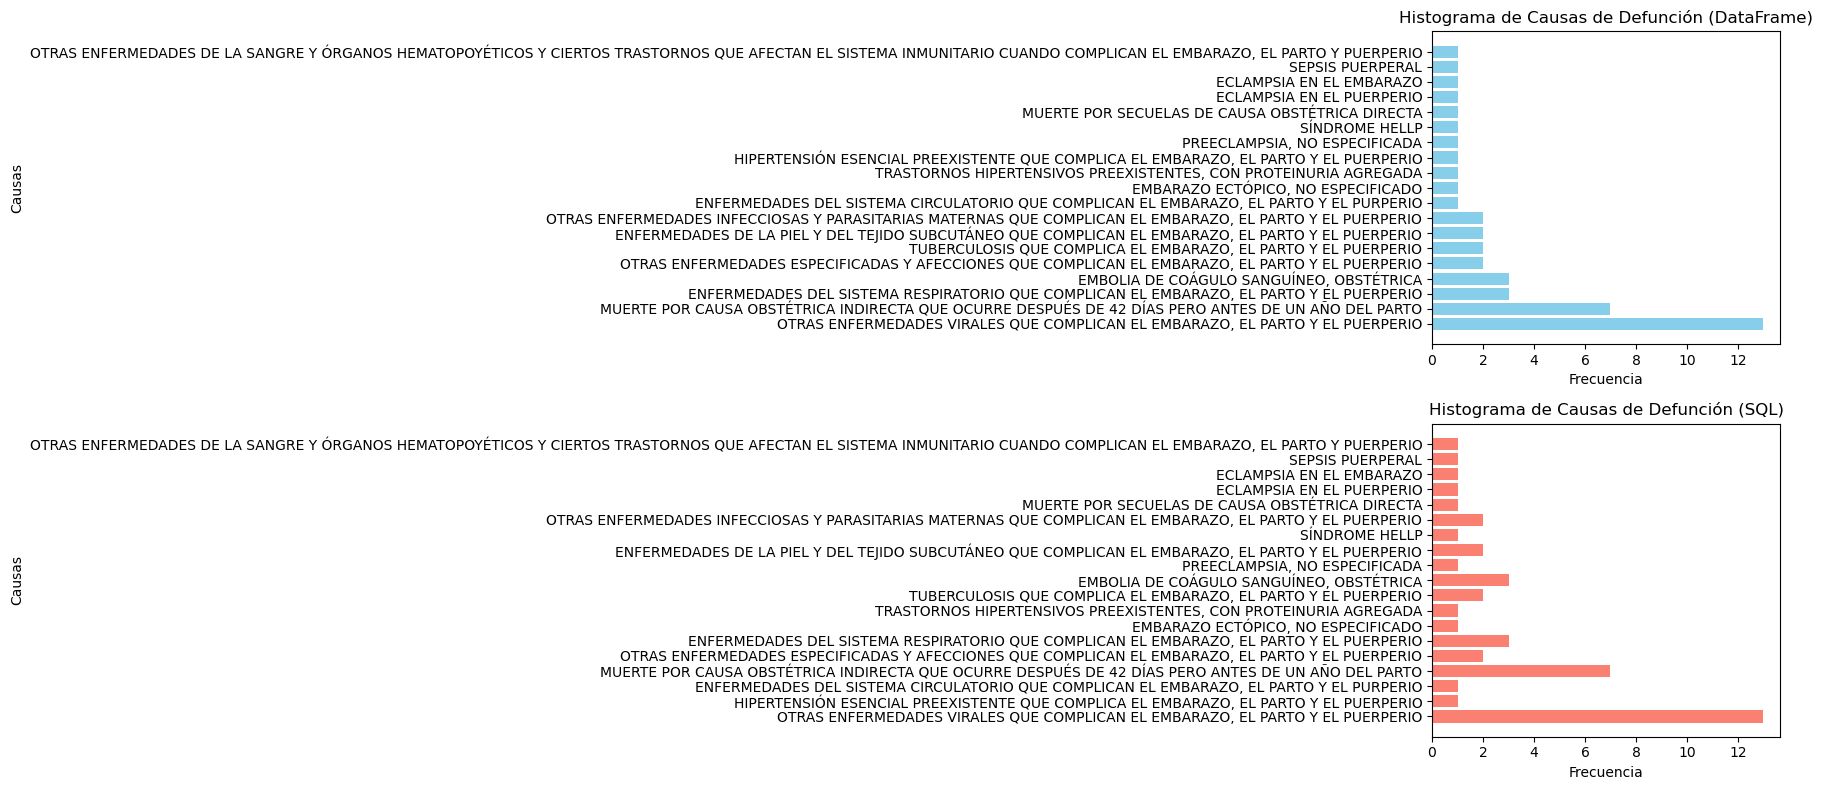

In [16]:
'''
Datos obtenidos directamente desde el DataFrame
'''
causas_trimmed = df_registros['CAUSA_CIE_4D'].str.slice(6)
frecuencia_causas = causas_trimmed.value_counts()
'''
Tambien podriamos hacer esto directamente con una consulta SQL. Asi que haremos las 2 formas
'''
causa_sql = consulta_sql('SELECT SUBSTRING(CAUSA_CIE_4D, 7) CAUSA_CIE_4D, COUNT(*) AS Frecuencia FROM defunciones WHERE ANIO_DEFUNCION BETWEEN 2021 AND 2022 AND ENTIDAD_RESIDENCIAD="SONORA" GROUP BY CAUSA_CIE_4D;')

plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
plt.barh(frecuencia_causas.index, frecuencia_causas.values, color='skyblue', label='DataFrame')
plt.xlabel('Frecuencia')
plt.ylabel('Causas')
plt.title('Histograma de Causas de Defunción (DataFrame)')

# Graficar desde SQL
plt.subplot(2, 1, 2)
plt.barh([fila[0] for fila in causa_sql], [fila[1] for fila in causa_sql], color='salmon', label='SQL')
plt.xlabel('Frecuencia')
plt.ylabel('Causas')
plt.title('Histograma de Causas de Defunción (SQL)')

plt.tight_layout()
plt.show()

Observamos que la mayor causa de defunción en Sonora en el año 2021-2022 fue por “OTRAS ENFERMEDADES VIRALES QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO” con 13 casos y la segunda “MUERTE POR CAUSA OBSTÉTRICA INDIRECTA QUE OCURRE DESPUÉS DE 42 DÍAS PERO ANTES DE UN AÑO DEL PARTO” con 7 casos.

¿Qué podemos deducir con esto? Con esto podemos decir que, en algún punto del embarazo, sufren de una enfermedad viral que complica el proceso. Por lo que ahora quiero ver si hay alguna relación con alguna otra columna, y haciendo un mapa de calor con cada de una de las columnas, llegué a que con la columna “ESTADO_CONYUGALD” hay una relación más notoria que con el resto en estas 2 causas que encontramos.

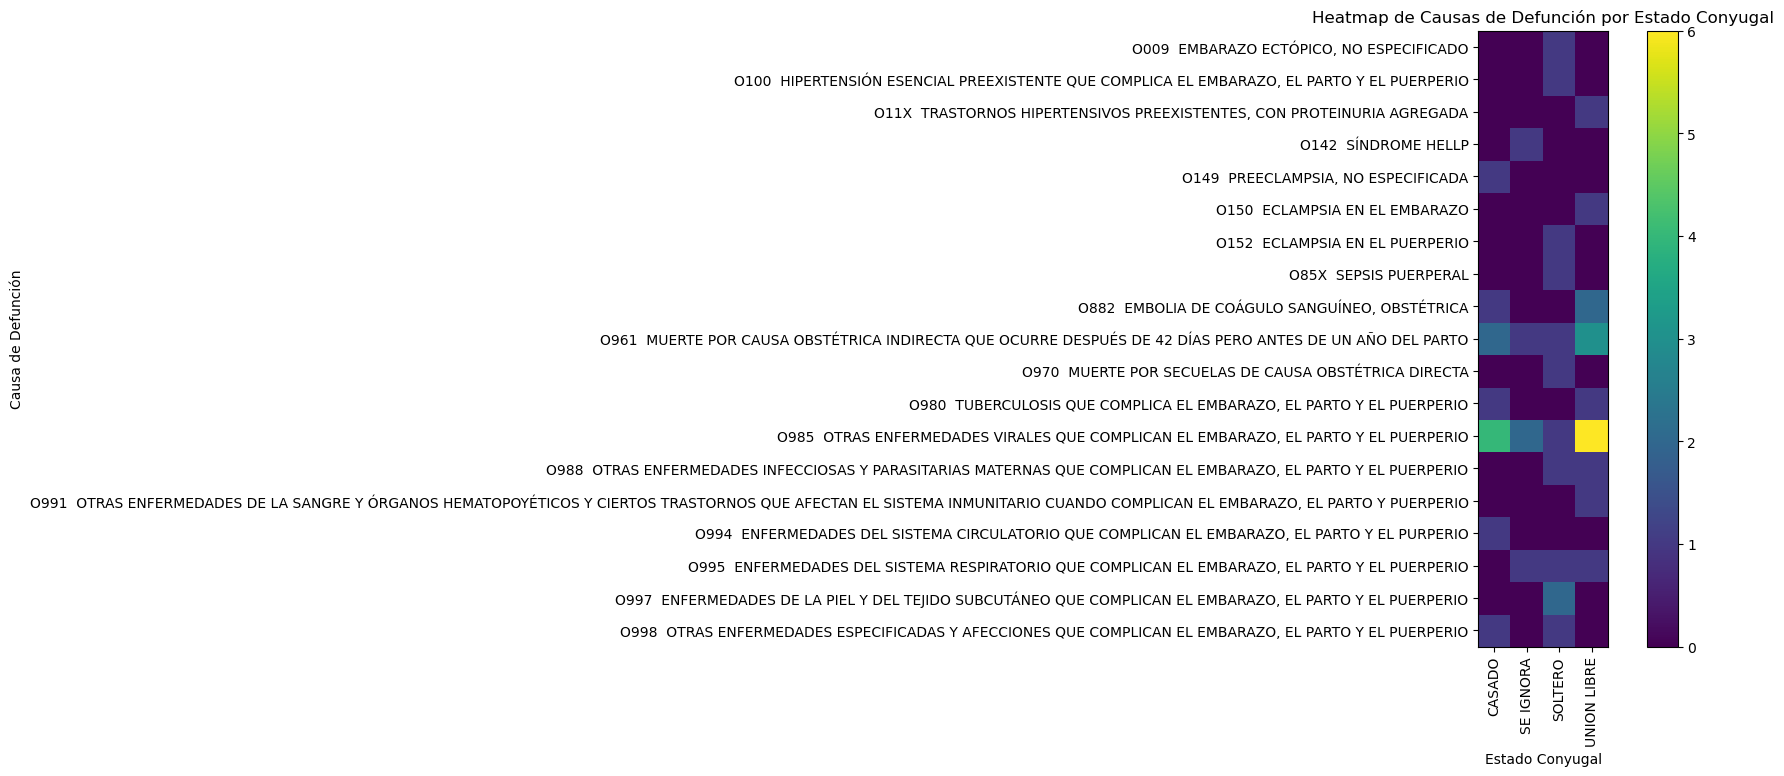

In [17]:
heatmap_data = df_registros.pivot_table(index='CAUSA_CIE_4D', columns='ESTADO_CONYUGALD', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest')
plt.title('Heatmap de Causas de Defunción por Estado Conyugal')
plt.xlabel('Estado Conyugal')
plt.ylabel('Causa de Defunción')
plt.colorbar()
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.show()

El dato que más destaca es:

“OTRAS ENFERMEDADES VIRALES QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO”
- 6 “UNION LIBRE”
- 4 “CASADO”
  
“MUERTE POR CAUSA OBSTÉTRICA INDIRECTA QUE OCURRE DESPUÉS DE 42 DÍAS PERO ANTES DE UN AÑO DEL PARTO”
- 3 “UNION LIBRE”
- 2 “CASADO”

Con esto no se quiere criticar/juzgar ni nada parecido, pero es interesante lo mucho que destacan estas relaciones en comparación a las demás columnas de los datos.

Con estos concluimos este pequeño análisis, en el cual podemos decir que la mayor causa de defunción en Sonora entre el año 2021 y 2022 fueron las infecciones virales y por complicaciones postparto. La correlación que se encontró sobre el estado civil ya es debatible si tiene un impacto real o no, pero al ser pocos datos tampoco se puede sacar una conclusión clara de si realmente tiene un impacto sobre los datos.